In [5]:
# importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [6]:
df=pd.read_csv(r"C:\Users\Ashu Kapil\Documents\NORTHEASTERN\Spring 19\Data Science Engineering Methods\Assignments\Assignment 2\\Computers.csv",decimal = ',')


In [7]:
df.head()

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [8]:
cd1={"yes":1,"no":0}

In [9]:
df.cd=[cd1[item] for item in df.cd]
df.head()

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,0,no,yes,94,1
1,2,1795,33,85,2,14,0,no,yes,94,1
2,3,1595,25,170,4,15,0,no,yes,94,1
3,4,1849,25,170,8,14,0,no,no,94,1
4,5,3295,33,340,16,14,0,no,yes,94,1


In [10]:
multi1={"yes":1,"no":0}
df.multi=[multi1[item] for item in df.multi]
df.head()

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,0,0,yes,94,1
1,2,1795,33,85,2,14,0,0,yes,94,1
2,3,1595,25,170,4,15,0,0,yes,94,1
3,4,1849,25,170,8,14,0,0,no,94,1
4,5,3295,33,340,16,14,0,0,yes,94,1


In [11]:
premium1={"yes":1,"no":0}
df.premium=[premium1[item] for item in df.premium]
df.head()

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,0,0,1,94,1
1,2,1795,33,85,2,14,0,0,1,94,1
2,3,1595,25,170,4,15,0,0,1,94,1
3,4,1849,25,170,8,14,0,0,0,94,1
4,5,3295,33,340,16,14,0,0,1,94,1


In [12]:
df.describe()

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,0.464611,0.139479,0.902221,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,0.498786,0.346474,0.297040,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.000000,0.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,0.000000,0.000000,1.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,0.000000,0.000000,1.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,0.000000,1.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,1.000000,1.000000,339.000000,35.000000


In [13]:
df.isnull().values.any()

False

In [14]:
df.drop('S.No.', axis=1, inplace=True)

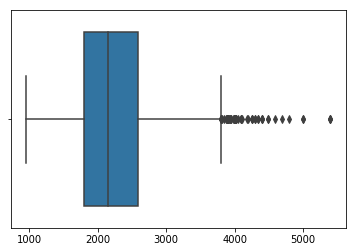

In [15]:
sns.boxplot(np.array(df['price']))

In [16]:
df.corr()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.197343,-0.016651,-0.080696,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,0.258260,0.084172,0.114208,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,0.503570,0.092805,0.196924,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,0.438504,0.045497,0.197145,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,0.129488,-0.001740,0.018745,-0.093919,0.188614
cd,0.197343,0.258260,0.503570,0.438504,0.129488,1.000000,0.432179,0.216077,-0.061091,0.445780
multi,-0.016651,0.084172,0.092805,0.045497,-0.001740,0.432179,1.000000,0.124775,-0.030394,0.210907
premium,-0.080696,0.114208,0.196924,0.197145,0.018745,0.216077,0.124775,1.000000,-0.152023,0.042107
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,-0.061091,-0.030394,-0.152023,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,0.445780,0.210907,0.042107,-0.318553,1.000000


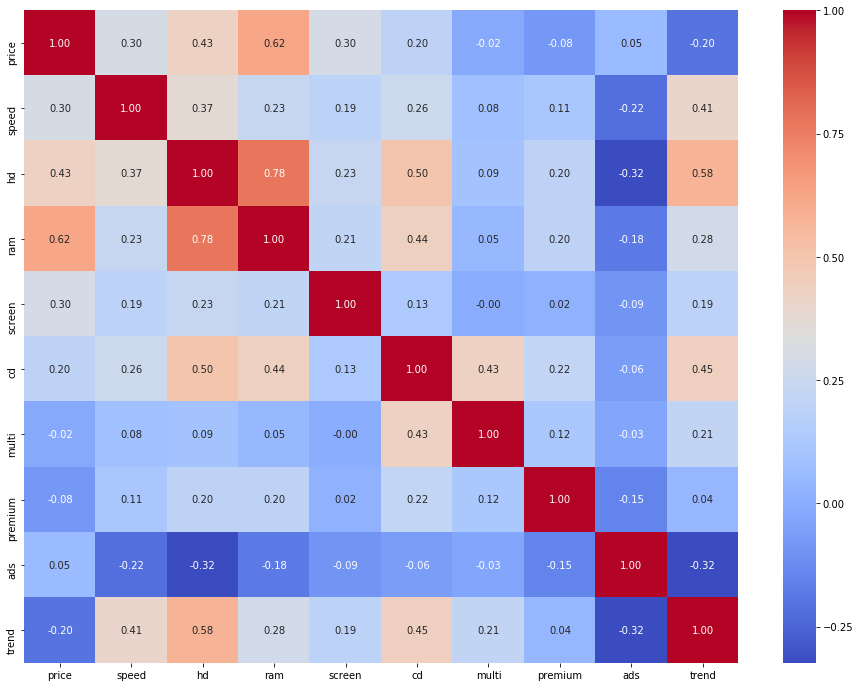

In [17]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

From the heatmap, we can understand that the major factors affecting the price of computers are speed, hd, ram, screen and cd. Now we can plot the heatmap just by taking these attributes

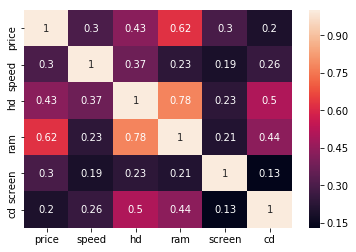

In [18]:
x=df[['price','speed','hd','ram','screen','cd']]
sns.heatmap(x.corr(), annot=True)

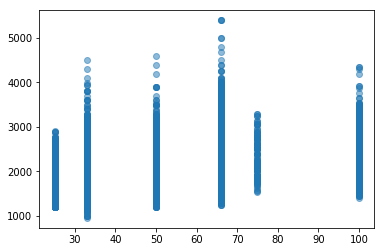

In [19]:
x=df['speed']
y=df['price']

plt.scatter(x, y,  alpha=0.5)
plt.show()

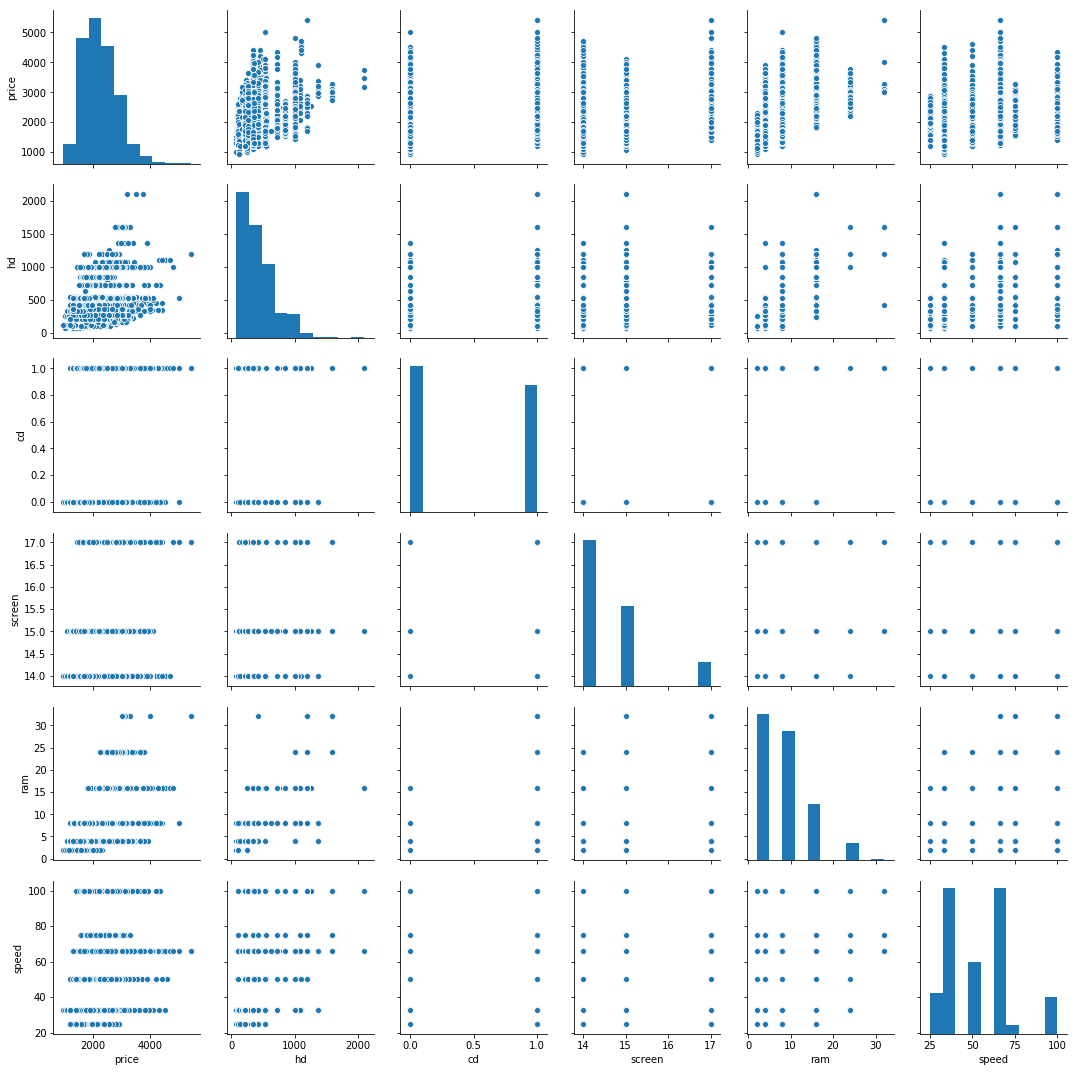

In [20]:

x=df[['price','hd','cd','screen','ram','speed']]
sns.pairplot(x)



In [21]:
y=df[['price']]
x=df[['hd','screen','cd','ram','speed']]
model =sm.OLS(y, x).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 3.526e+04
Date:                Mon, 18 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:49:00   Log-Likelihood:                -46756.
No. Observations:                6259   AIC:                         9.352e+04
Df Residuals:                    6254   BIC:                         9.356e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hd            -0.5010      0.036    -13.953      0.000      -0.571      -0.431
screen       105.9458      1.059    100.035      0.000     103.870     108.022
cd          -110.6660     12.569     -8.805      0.000    -135.305     -86.027
ram           78.0290      1.533     50.899      0.000      75.024      81.034
speed          5.4858      0.278     19.737      0.000       4.941       6.031
==============================================================================
Omnibus:                     1469.353   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4247.229
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                       6.210   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['hd','screen','cd','ram','speed']
target = 'price'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [24]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 425.2344819190514 msle_train: 0.035465918125384376
rmse_test: 423.83881908802005 msle_test: 0.03517070176699261


## Model2

In [25]:
y=df[['price']]
x=df[['screen','cd','ram','speed']]
model =sm.OLS(y, x).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 4.270e+04
Date:                Mon, 18 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:52:10   Log-Likelihood:                -46852.
No. Observations:                6259   AIC:                         9.371e+04
Df Residuals:                    6255   BIC:                         9.374e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
screen       105.2927      1.074     98.010      0.000     103.187     107.399
cd          -154.2977     12.361    -12.483      0.000    -178.529    -130.067
ram           62.8373      1.096     57.344      0.000      60.689      64.985
speed          4.4610      0.272     16.390      0.000       3.927       4.995
==============================================================================
Omnibus:                      992.797   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2109.278
Skew:                           0.943   Prob(JB):                         0.00
Kurtosis:                       5.129   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['screen','cd','ram','speed']
target = 'price'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [28]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 431.96637774144136 msle_train: 0.03699920610278498
rmse_test: 429.5331110984882 msle_test: 0.03545411554988303


## Model 3

In [29]:
y=df[['price']]
x=df[['screen','ram','speed']]
model =sm.OLS(y, x).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 5.551e+04
Date:                Mon, 18 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:54:50   Log-Likelihood:                -46929.
No. Observations:                6259   AIC:                         9.386e+04
Df Residuals:                    6256   BIC:                         9.389e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
screen       105.5775      1.087     97.103      0.000     103.446     107.709
ram           57.3786      1.017     56.413      0.000      55.385      59.372
speed          3.8707      0.271     14.265      0.000       3.339       4.403
==============================================================================
Omnibus:                     1089.310   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2302.428
Skew:                           1.027   Prob(JB):                         0.00
Kurtosis:                       5.147   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['screen','ram','speed']
target = 'price'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [32]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 433.75139632954136 msle_train: 0.03608679143384214
rmse_test: 442.9517811908278 msle_test: 0.03790746736736451


From the 3 models, we understand that there is very less difference in all the three. However, Adjusted RSquare is maximum in all three models. Also RMSE is also lowest in the first model. That is why we can say first model is the best fit.

## Interaction Effects


1. Interacting hd and cd

In [33]:
hd_cd_model_A = ols("price ~ hd + cd + screen + ram + speed + hd : cd -1", data=df).fit()
hd_cd_model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 3.206e+04
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:33:40   Log-Likelihood:                -46492.
No. Observations:                6259   AIC:                         9.300e+04
Df Residuals:                    6253   BIC:                         9.304e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hd             0.2859      0.048      5.953      0.000       0.192       0.380
cd           330.2900     22.302     14.810      0.000     286.570     374.010
screen        88.8356      1.249     71.099      0.000      86.386      91.285
ram           82.8001      1.484     55.811      0.000      79.892      85.708
speed          5.2537      0.267     19.704      0.000       4.731       5.776
hd:cd         -1.1960      0.051    -23.496      0.000      -1.296      -1.096
==============================================================================
Omnibus:                     1312.803   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4157.743
Skew:                           1.064   Prob(JB):                         0.00
Kurtosis:                       6.378   Cond. No.                     2.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a slight improvement in the adjusted Rsquare when we have done the interaction hd and cd. Also AIC and BIC have also improved. This shows that the combined effect of hd and cd has higher effect on pricing than individual predictors

2. Interacting ram and speed


In [34]:
ram_speed_model_B = ols("price ~ hd + cd + screen + ram + speed + ram : speed -1", data=df).fit()
ram_speed_model_B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 2.988e+04
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:37:49   Log-Likelihood:                -46705.
No. Observations:                6259   AIC:                         9.342e+04
Df Residuals:                    6253   BIC:                         9.346e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hd            -0.4971      0.036    -13.957      0.000      -0.567      -0.427
cd          -109.0730     12.468     -8.748      0.000    -133.514     -84.632
screen        92.5431      1.683     54.972      0.000      89.243      95.843
ram          101.2183      2.737     36.978      0.000      95.852     106.584
speed          9.2499      0.461     20.066      0.000       8.346      10.154
ram:speed     -0.4220      0.041    -10.189      0.000      -0.503      -0.341
==============================================================================
Omnibus:                     1501.657   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4394.202
Skew:                           1.245   Prob(JB):                         0.00
Kurtosis:                       6.263   Cond. No.                     1.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This result that the interaction of ram and speed has lesser effect on price on computer as compared to that of its individual effect.

## Logistic Regression
